# 3. Tasks and Questions

## 3.1 Convergence and attractors

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [275]:
x1 = np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
x2 = np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
x3 = np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

In [302]:
def create_w(patterns_list, size):
    # Generate a matrix of weights with the patterns
    w = np.zeros([size,size])
    for pattern in patterns_list:
        w += pattern.T @ pattern
    return(w)

def update_vect(w, x):
    # compile the result of sign( sum ( wij * xj))
    y = np.sign(x @ w)
    return(y)

def update_vect_sequential(w, x):
    # compile the result of sign( sum ( wij * xj)) but one component after the other
    x_new = [i for i in x] # deep copy
    n = w.shape[0]
    for i in range(n):
        xi = 0
        for j in range(n):
            xi += w[i,j]*x_new[j]
        x_new[i] = np.sign(xi)
    return(x_new)

# Give the stable vector after iterating through the network
def convergence_with_step(w,x):
    vect = np.array([i for i in x]) # deep copy
    diff = 1
    i = 0
    while diff != 0:
        i += 1
        old_vect = np.array([i for i in vect])
        vect = update_vect(w, vect)
        diff = np.sum(abs(vect-old_vect))
    return(vect, i)

def convergence(w,x):
    vect = np.array([i for i in x]) # deep copy
    diff = 1
    while diff != 0:
        old_vect = np.array([i for i in vect])
        vect = update_vect(w, vect)
        diff = np.sum(abs(vect-old_vect))
    return(vect)

# Give the stable vector after iterating through the network for sequential update
def convergence_with_step_sequencial(w,x):
    vect = np.array([i for i in x]) # deep copy
    diff = 1
    i = 0
    while diff != 0:
        i += 1
        old_vect = np.array([i for i in vect])
        vect = update_vect_sequential(w, vect)
        diff = np.sum(abs(vect-old_vect))
    return(vect, i)

In [277]:
w = create_w([x1, x2, x3], 8)

In [278]:
# test recall
print('Recall on x1, difference between compilation result and x1')
print(update_vect(w, x1)-x1)
print('Recall on x2, difference between compilation result and x2')
print(update_vect(w, x2)-x2)
print('Recall on x2, difference between compilation result and x3')
print(update_vect(w, x3)-x3)

Recall on x1, difference between compilation result and x1
[[0. 0. 0. 0. 0. 0. 0. 0.]]
Recall on x2, difference between compilation result and x2
[[0. 0. 0. 0. 0. 0. 0. 0.]]
Recall on x2, difference between compilation result and x3
[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [279]:
x1d = np.array([[1, -1, 1, -1, 1, -1, -1, 1]])
x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]])
x3d = np.array([[1, 1, 1, -1, 1, 1, -1, 1]])

In [280]:
# Applying update rule until convergence:

# x1d
vect, i = convergence_with_step(w, x1)
print("Fixed point for x1d reached in", i, "steps")
print('difference between convergence vect and x1',vect-x1)

# x2d
vect, i = convergence_with_step(w, x2)
print("Fixed point for x2d reached in", i, "steps")
print('difference between convergence vect and x2',vect-x2)

# x3d
vect, i = convergence_with_step(w, x3)
print("Fixed point for x3d reached in", i, "steps")
print('difference between convergence vect and x3',vect-x3)

Fixed point for x1d reached in 1 steps
difference between convergence vect and x1 [[0. 0. 0. 0. 0. 0. 0. 0.]]
Fixed point for x2d reached in 1 steps
difference between convergence vect and x2 [[0. 0. 0. 0. 0. 0. 0. 0.]]
Fixed point for x3d reached in 1 steps
difference between convergence vect and x3 [[0. 0. 0. 0. 0. 0. 0. 0.]]


In [281]:
# Finding the attractors: We will test for each vector possible what is its state of convergence
# Generating all combination:
combinations = np.array([i for i in product([-1, 1], repeat = 8)])
convergence_vectors = x1
for comb in range(len(combinations)):
    vect = convergence(w, combinations[comb])
    vect_in_conv = np.any(np.sum(vect == np.array(convergence_vectors), axis = 1)==8)
    minus_vect_in_conv = np.any(np.sum(-vect == np.array(convergence_vectors), axis = 1)==8)
    if(vect_in_conv ==  False and minus_vect_in_conv == False):
        convergence_vectors = np.concatenate([convergence_vectors, np.array([vect])])
print(convergence_vectors)

[[-1. -1.  1. -1.  1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1.  1. -1. -1.  1. -1.  1.]
 [-1. -1.  0. -1. -1.  1. -1.  0.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [ 1. -1. -1.  1.  1. -1.  1. -1.]
 [ 0.  0. -1.  0. -1.  1.  0. -1.]
 [-1. -1.  1. -1.  0.  0. -1.  1.]]


We have 8 vectors, which is normal because the dimension is 8

As we have seen by testing all the combinations possible, it always converge, whatever the distance we are from the patterns

## 3.2 Sequential update

In [282]:
pict = np.reshape(np.loadtxt('../../pict.dat', delimiter=','), newshape=[11,1024])

In [283]:
def plot_pict(v, ax):
    cmap = mpl.colors.ListedColormap(['w', 'k'])
    ax.imshow(np.reshape(v, [32,32]), cmap)

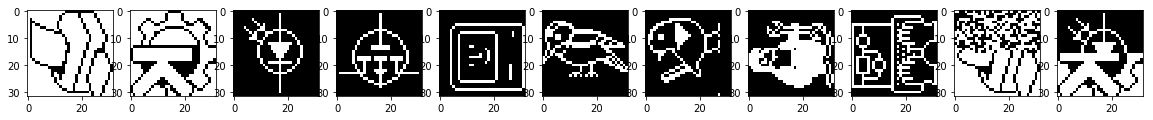

In [284]:
# Plotting the vectors
fig, ax = plt.subplots(1,11, figsize = [20,6])
for i in range(11):
    plot_pict(pict[i,:], ax[i])

In [285]:
# Checking stability of the three patterns
i_max = 3
w = create_w([np.array([pict[i,:]]) for i in range(i_max)], 1024)
print("shape w:", w.shape)
for i in range(i_max):
    print("Sum abs(recall(p1)-p1) =", np.sum(abs(update_vect(w, pict[0,:])-pict[0,:])))

shape w: (1024, 1024)
Sum abs(recall(p1)-p1) = 0.0
Sum abs(recall(p1)-p1) = 0.0
Sum abs(recall(p1)-p1) = 0.0


In [286]:
# Test on p10 and p11
vect = convergence(w, pict[9,:])
print("Convergence of p10 into p1:",np.sum(vect == pict[0,:])==1024, '\n')

vect = convergence(w, pict[10,:])
print("Convergence of p11 into p2:",np.sum(vect == pict[1,:])==1024)
print("Convergence of p11 into p3:",np.sum(vect == pict[2,:])==1024)

Convergence of p10 into p1: True 

Convergence of p11 into p2: False
Convergence of p11 into p3: False


In [298]:
# On random vect
random_vect = 2*np.random.randint(2, size=1024)-1

In [316]:
# compile the result of sign( sum ( wij * xj)) but one component after the other
# matrix with results
m = np.array([])
# number of iterations
k, old_k = 0, 0
# step of tracks
k_step = 100

x_new = [i for i in random_vect] # deep copy
n = w.shape[0]
diff = 1
while diff != 0:
    old_x = np.array([i for i in x_new])
    for i in range(n):
        xi = 0
        for j in range(n):
            xi += w[i,j]*x_new[j]
        x_new[i] = np.sign(xi)
        
        k += 1
        if(k % 100 != old_k % 100):
            m = np.concatenate([m,x_new])
            old_k = k
    diff = np.sum(abs(old_x-x_new))
m = m.reshape([3072,1024])

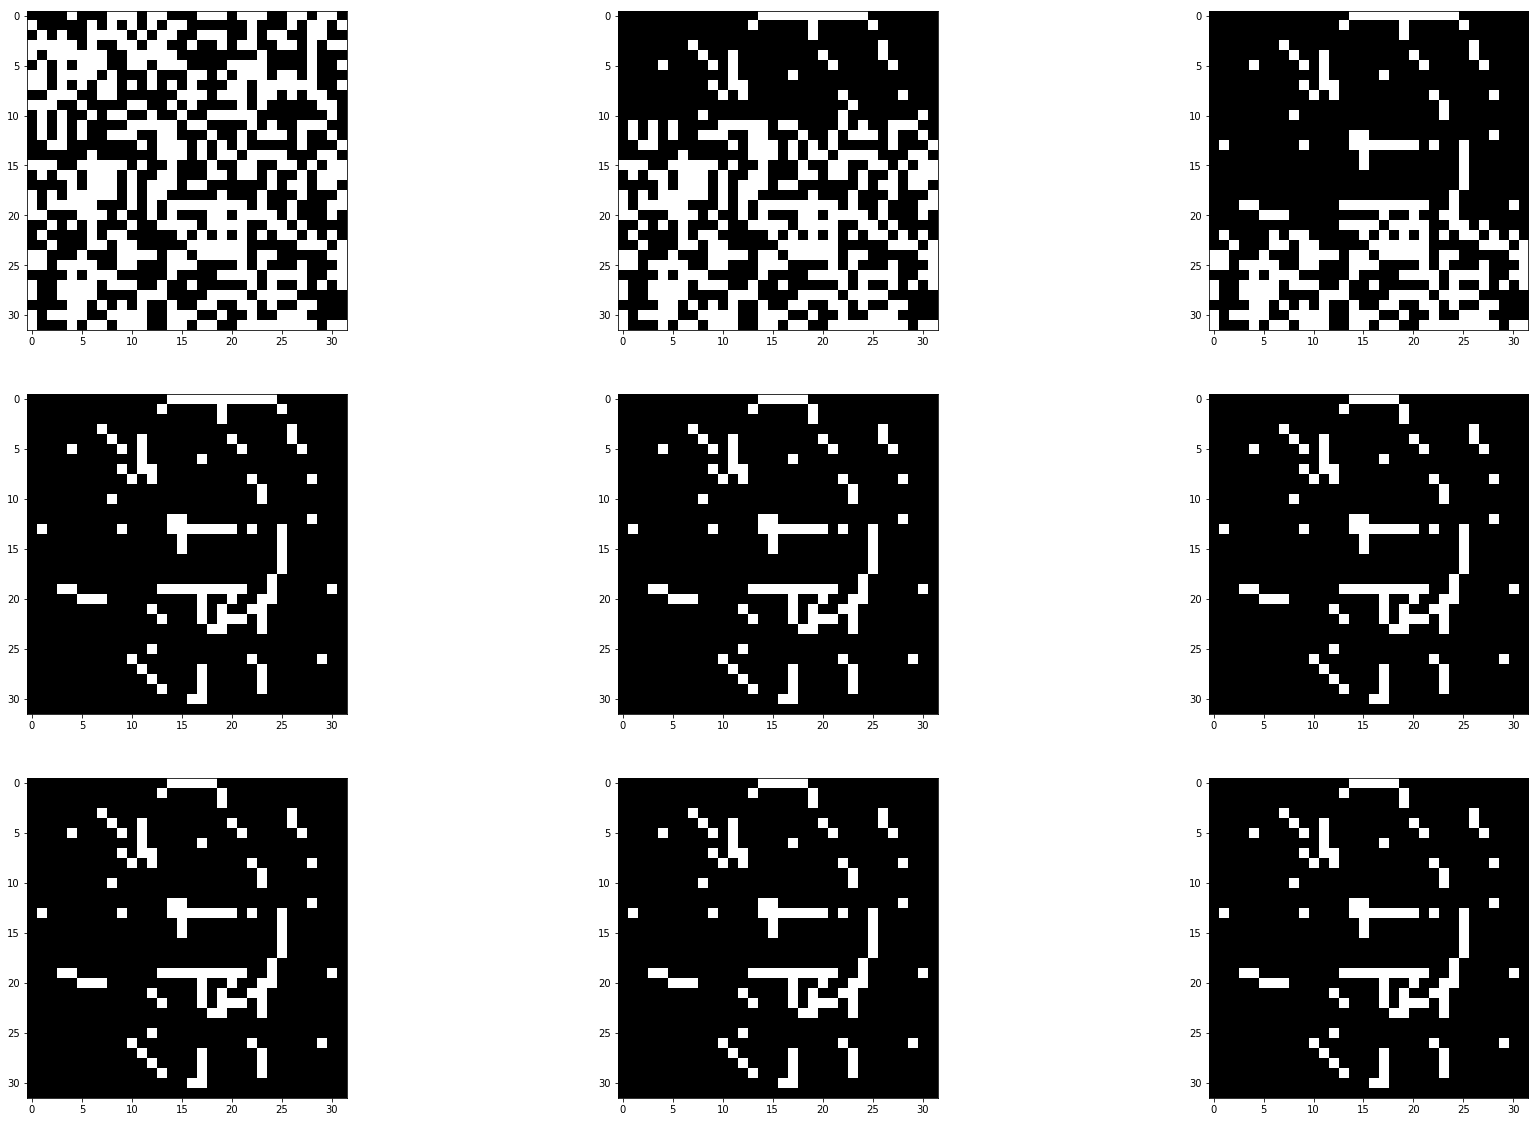

In [327]:
n = m.shape[0]
inc = int(n/9)
fig, ax = plt.subplots(3,3, figsize = [30,20])
for i in range(3):
    for j in range(3):
        plot_pict(ax=ax[i,j], v=m[i*3*inc + j*inc])